In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv('carprices.csv')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 544.0+ bytes


In [96]:
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


With dummies

In [97]:
dummies = pd.get_dummies(df['Car Model'])

In [98]:
merged = pd.concat([df, dummies], axis='columns')

In [99]:
merged.drop('Car Model', axis='columns', inplace=True)

In [100]:
merged.head(10)

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,False,True,False
1,35000,34000,3,False,True,False
2,57000,26100,5,False,True,False
3,22500,40000,2,False,True,False
4,46000,31500,4,False,True,False
5,59000,29400,5,True,False,False
6,52000,32000,5,True,False,False
7,72000,19300,6,True,False,False
8,91000,12000,8,True,False,False
9,67000,22000,6,False,False,True


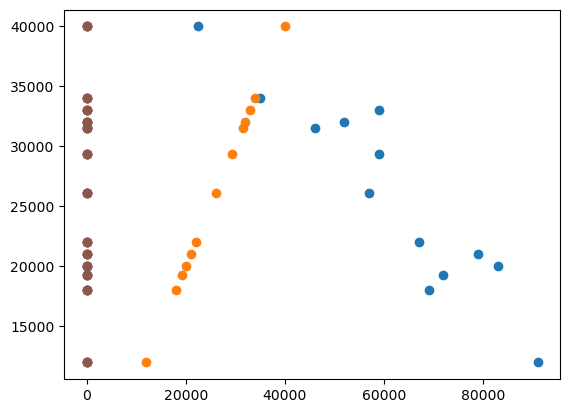

In [101]:
for column in merged.columns:
    plt.plot(merged[column], df['Sell Price($)'], 'o')

In [102]:
X = merged.drop('Sell Price($)', axis='columns').values
y = merged['Sell Price($)'].values
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [103]:
model.predict([[45000, 4, 0, 0, 1]])

array([36991.31721061])

In [104]:
model.predict([[86000, 7, 0, 1, 0]])

array([11080.74313219])

In [105]:
model.score(X, y)

0.9417050937281082

With OneHot Encoding

In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Car Model'] = le.fit_transform(df['Car Model'])
df.head(10)

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


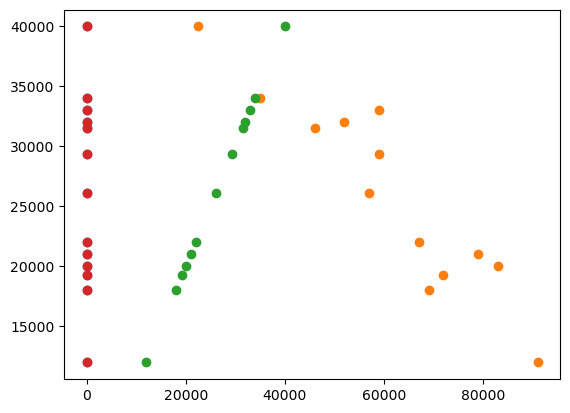

In [107]:
for column in df.columns:
    plt.plot(df[column], df['Sell Price($)'], 'o')

In [108]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df.drop('Sell Price($)', axis='columns').values
y = df['Sell Price($)'].values
model.fit(X, y)

LinearRegression()

In [111]:
model.predict([[1, 45000, 4]])

array([32235.09961376])

In [110]:
model.score(X, y)

0.8719970367825953